# Contemp Scope Analysis

Run the model averaging pipeline per scope and review the selected scope's outputs.

In [2]:
from pathlib import Path

import pandas as pd
from IPython.display import SVG, display

from analysis.model_analysis import run_scope_analyses

In [3]:
project_root = Path.cwd()
data_path = project_root / 'data' / 'contemp.csv'
output_base = project_root / 'outputs/contemp'
scope_name = 'Global'  # change to another scope as needed

pd.set_option('display.max_rows', 25)
pd.set_option('display.max_columns', 20)
print(f'Data: {data_path}')
print(f'Output base: {output_base}')
print(f'Selected scope: {scope_name}')

Data: c:\Users\amahai00\OneDrive - Kungl. Vetenskapsakademien\Desktop\Idag\regression\data\contemp.csv
Output base: c:\Users\amahai00\OneDrive - Kungl. Vetenskapsakademien\Desktop\Idag\regression\outputs\contemp
Selected scope: Global


In [4]:
scope_results = run_scope_analyses(data_path, output_base)
available_scopes = sorted(scope_results.keys())
print('Available scopes:', ', '.join(available_scopes))
if scope_name not in scope_results:
    raise ValueError(f'Scope {{scope_name}} not found; choose one of {{available_scopes}}')
scope_result = scope_results[scope_name]
print(f"Models analyzed for {{scope_name}}: {{scope_result['model_count']}}")

Available scopes: Africa, Asia, Europe, Global
Models analyzed for {scope_name}: {scope_result['model_count']}


## Model weights

In [5]:
model_weights = pd.DataFrame(scope_result['model_rows'])
model_weights.head(20)

,spec_id,scope,dv,formula,n,aic,aicc,bic,logLik,converged,delta_aicc,akaike_weight,aicc_rank
0,2de5b3dc48d10aa9af6031599a53c60b,Global,Outbreak,Outbreak ~ scale(Year) + CLIMATIC + INTRASTATE...,3221,3527.998646,3528.033504,3570.540776,-1756.999323,True,0.000000,0.042677,1
1,2de5b3dc48d10aa9af6031599a53c60b,Global,Outbreak,Outbreak ~ scale(Year) + CLIMATIC + INTRASTATE...,3221,3527.998646,3528.033504,3570.540776,-1756.999323,True,0.000000,0.042677,2
2,efbc0671217f21103e56b39612736555,Global,Outbreak,Outbreak ~ scale(Year) + CLIMATIC + GEOPHYSICA...,3221,3529.581756,3529.616614,3572.123886,-1757.790878,True,1.583110,0.019338,3
3,efbc0671217f21103e56b39612736555,Global,Outbreak,Outbreak ~ scale(Year) + CLIMATIC + GEOPHYSICA...,3221,3529.581756,3529.616614,3572.123886,-1757.790878,True,1.583110,0.019338,4
4,93ce8f623d79b202407a60a4c2373d78,Global,Outbreak,Outbreak ~ scale(Year) + CLIMATIC + TECHNOLOGI...,3221,3529.763460,3529.789596,3566.228143,-1758.881730,True,1.756091,0.017736,5
5,26663a46f9b1dc156db6567ea56f6ef3,Global,Outbreak,Outbreak ~ scale(Year) + CLIMATIC + ECONOMIC +...,3221,3529.850704,3529.885563,3572.392834,-1757.925352,True,1.852058,0.016905,6
6,26663a46f9b1dc156db6567ea56f6ef3,Global,Outbreak,Outbreak ~ scale(Year) + CLIMATIC + ECONOMIC +...,3221,3529.850704,3529.885563,3572.392834,-1757.925352,True,1.852058,0.016905,7
7,ee0fc07e65eef844b7aa0495180c9af0,Global,Outbreak,Outbreak ~ scale(Year) + CLIMATIC + INTERSTATE...,3221,3529.950747,3529.985605,3572.492877,-1757.975374,True,1.952101,0.016080,8
8,5af15c1d27daa552639f350ffe9a7cf8,Global,Outbreak,Outbreak ~ scale(Year) + CLIMATIC + INTERSTATE...,3221,3529.950747,3529.985605,3572.492877,-1757.975374,True,1.952101,0.016080,9
9,ee0fc07e65eef844b7aa0495180c9af0,Global,Outbreak,Outbreak ~ scale(Year) + CLIMATIC + INTERSTATE...,3221,3529.950747,3529.985605,3572.492877,-1757.975374,True,1.952101,0.016080,10


## Model-averaged coefficients

In [6]:
coef_summary = pd.DataFrame(scope_result['coefficient_summary'])
coef_summary

,term,weight_sum,weighted_estimate,weighted_sd,weighted_std_error
0,INTERSTATE__bin,0.148121,0.462691,0.048204,0.289804
1,INTRASTATE,0.296956,0.163455,0.010423,0.077825
2,GEOPHYSICAL,0.188576,0.114150,0.077639,0.082201
3,ECONOMIC,0.198949,0.097482,0.006166,0.077789
4,CLIMATIC,0.987477,0.075243,0.009947,0.017218
5,POISONING__bin,0.025829,0.067996,0.338636,0.468695
6,TECHNOLOGICAL,0.334923,0.040547,0.003747,0.014168
7,TERRORISM,0.014015,-0.000331,0.000072,0.000400
8,ECOLOGICAL__bin,0.121875,-0.216793,0.488010,0.508258


## Predictor importance

In [7]:
importance = pd.DataFrame(scope_result['importance'])
importance

,term,importance_weight
0,CLIMATIC,0.987477
1,TECHNOLOGICAL,0.334923
2,INTRASTATE,0.296956
3,ECONOMIC,0.198949
4,GEOPHYSICAL,0.188576
5,INTERSTATE__bin,0.172073
6,ECOLOGICAL__bin,0.121875
7,POISONING__bin,0.025829
8,TERRORISM,0.014015


## Scope/DV summary

In [8]:
scope_summary = pd.DataFrame(scope_result['scope_summary'])
scope_summary

,scope,dv,n_models,best_aicc,top_weight
0,Global,Outbreak,4095,3528.033504,0.042677


## Visualisations

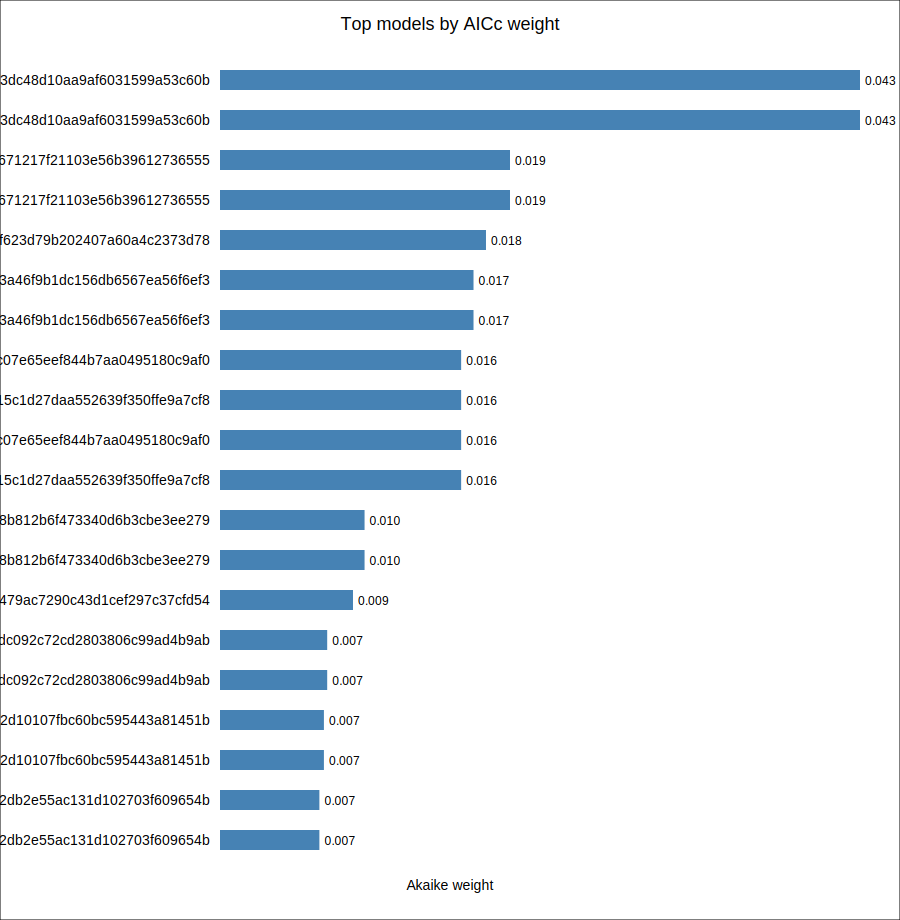

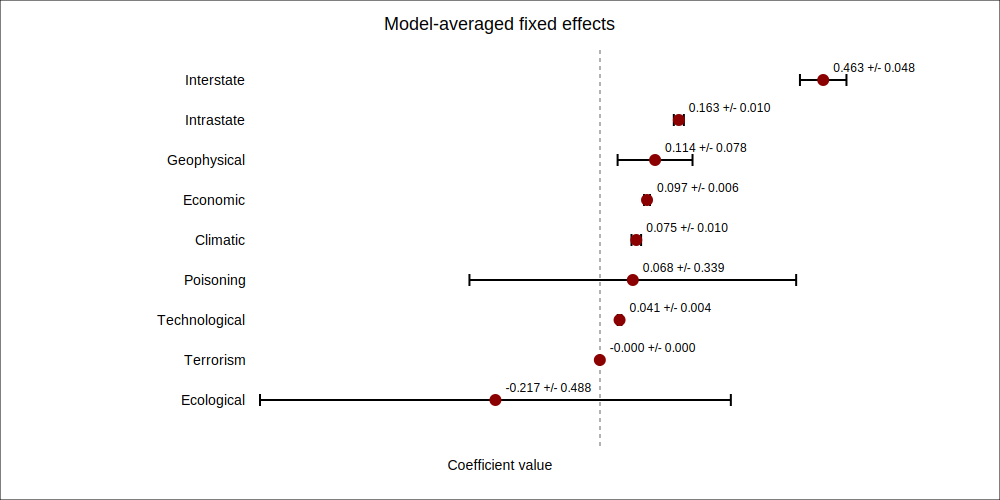

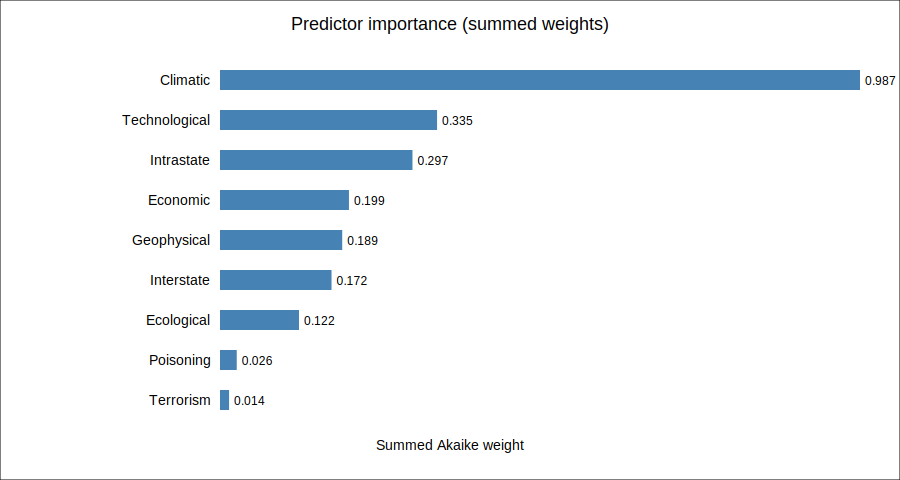

In [9]:
output_paths = scope_result['outputs']
if output_paths['top_model_weights_svg'] and output_paths['top_model_weights_svg'].exists():
    display(SVG(output_paths['top_model_weights_svg'].read_text()))

if output_paths['weighted_coefficients_svg'] and output_paths['weighted_coefficients_svg'].exists():
    display(SVG(output_paths['weighted_coefficients_svg'].read_text()))

if output_paths['predictor_importance_svg'] and output_paths['predictor_importance_svg'].exists():
    display(SVG(output_paths['predictor_importance_svg'].read_text()))